##### Classify the Size_Categorie using SVM

- month	month of the year: 'jan' to 'dec'
- day	day of the week: 'mon' to 'sun'
- FFMC	FFMC index from the FWI system: 18.7 to 96.20
- DMC	DMC index from the FWI system: 1.1 to 291.3
- DC	DC index from the FWI system: 7.9 to 860.6
- ISI	ISI index from the FWI system: 0.0 to 56.10
- temp	temperature in Celsius degrees: 2.2 to 33.30
- RH	relative humidity in %: 15.0 to 100
- wind	wind speed in km/h: 0.40 to 9.40
- rain	outside rain in mm/m2 : 0.0 to 6.4
- Size_Categorie 	the burned area of the forest ( Small , Large)

##### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import svm, preprocessing, metrics
from sklearn.model_selection import GridSearchCV, train_test_split

import warnings
warnings.filterwarnings('ignore')

##### Reading the DataSet

In [2]:
df = pd.read_csv('forestfires.csv')
df.head(25)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


##### Checking for null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
df.shape

(517, 31)

In [5]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

##### Checking for duplicate values in the DataFrame and droping them

In [7]:
sum(df.duplicated())

8

In [8]:
df[df.duplicated(keep = False)]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
52,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
99,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
214,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
302,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
425,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small


In [9]:
df = df.drop_duplicates()
df = df.drop(df.columns[11:30], axis = 1)
df.shape

(509, 12)

In [10]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [11]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

##### Encode columns into numeric

In [12]:
label_encoder=preprocessing.LabelEncoder()

df["size_category"]=label_encoder.fit_transform(df["size_category"])

df.month.replace(("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"),(1,2,3,4,5,6,7,8,9,10,11,12), inplace = True )

df.day.replace(("mon","tue","wed","thu","fri","sat","sun"),(1,2,3,4,5,6,7), inplace = True )

In [13]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


##### Find the outliers in each of the column

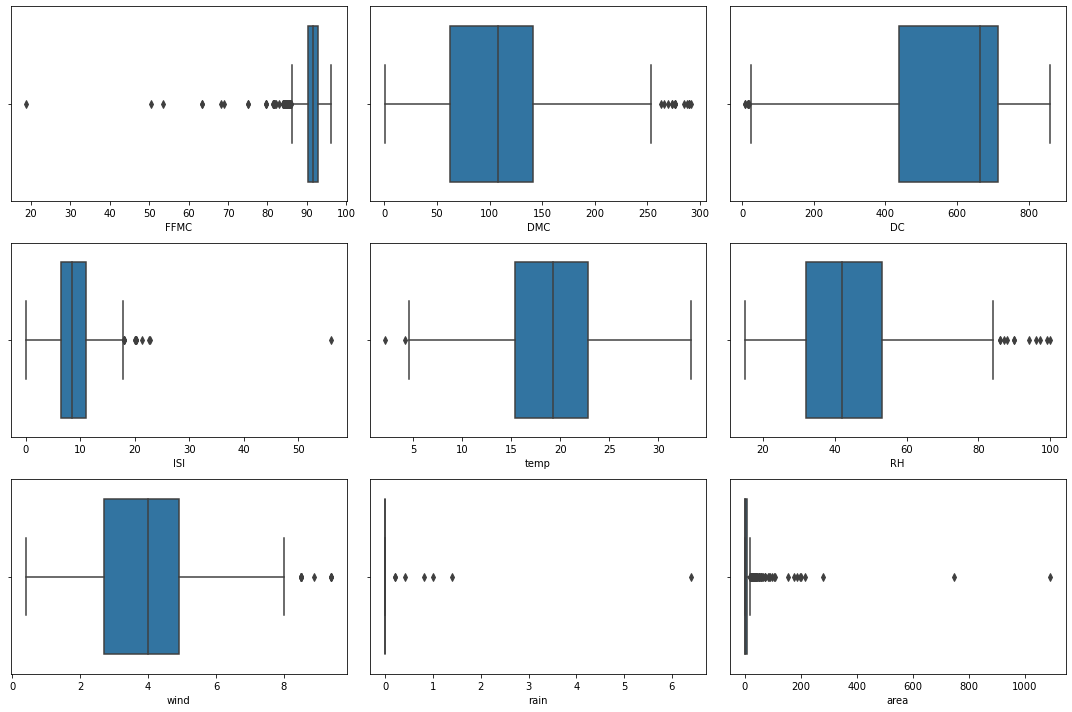

In [14]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))

sns.boxplot(df.FFMC, ax=ax[0,0])
sns.boxplot(df.DMC, ax=ax[0,1])
sns.boxplot(df.DC, ax=ax[0,2])
sns.boxplot(df.ISI, ax=ax[1,0])
sns.boxplot(df.temp, ax=ax[1,1])
sns.boxplot(df.RH, ax=ax[1,2])
sns.boxplot(df.wind, ax=ax[2,0])
sns.boxplot(df.rain, ax=ax[2,1])
sns.boxplot(df.area, ax=ax[2,2])


plt.tight_layout()
plt.show()

In [15]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category']
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(df[item]))

Outliers: 

month :  (array([  0,   3,   4,  16,  18,  39,  48,  49,  57,  58,  59,  60,  68,
        69,  71,  74,  75,  76,  88,  90,  95,  96, 102, 103, 104, 108,
       109, 112, 113, 114, 115, 116, 124, 128, 129, 130, 132, 144, 158,
       160, 163, 166, 180, 184, 186, 187, 188, 199, 200, 202, 211, 212,
       216, 219, 279, 280, 281, 374, 375, 383, 386, 389, 390, 391, 403,
       406, 407, 413, 442, 457, 458, 459, 460, 461, 462], dtype=int64),)
day :  (array([], dtype=int64),)
FFMC :  (array([ 12,  17,  40,  57,  74,  95,  96, 102, 103, 108, 121, 128, 136,
       145, 163, 169, 174, 179, 194, 197, 200, 230, 236, 238, 270, 271,
       272, 273, 274, 275, 276, 277, 278, 279, 281, 296, 300, 308, 375,
       386, 390, 391, 403, 406, 407, 457, 458, 459, 503, 504, 505, 506,
       508], dtype=int64),)
DMC :  (array([365, 366, 370, 380, 388, 402, 404, 418, 425, 429, 435, 439, 443,
       448, 454, 456], dtype=int64),)
DC :  (array([ 96, 102, 236, 280, 281, 457, 458, 459], dtype=int64),)

##### Cheking if the data is normally distributed, using distplot

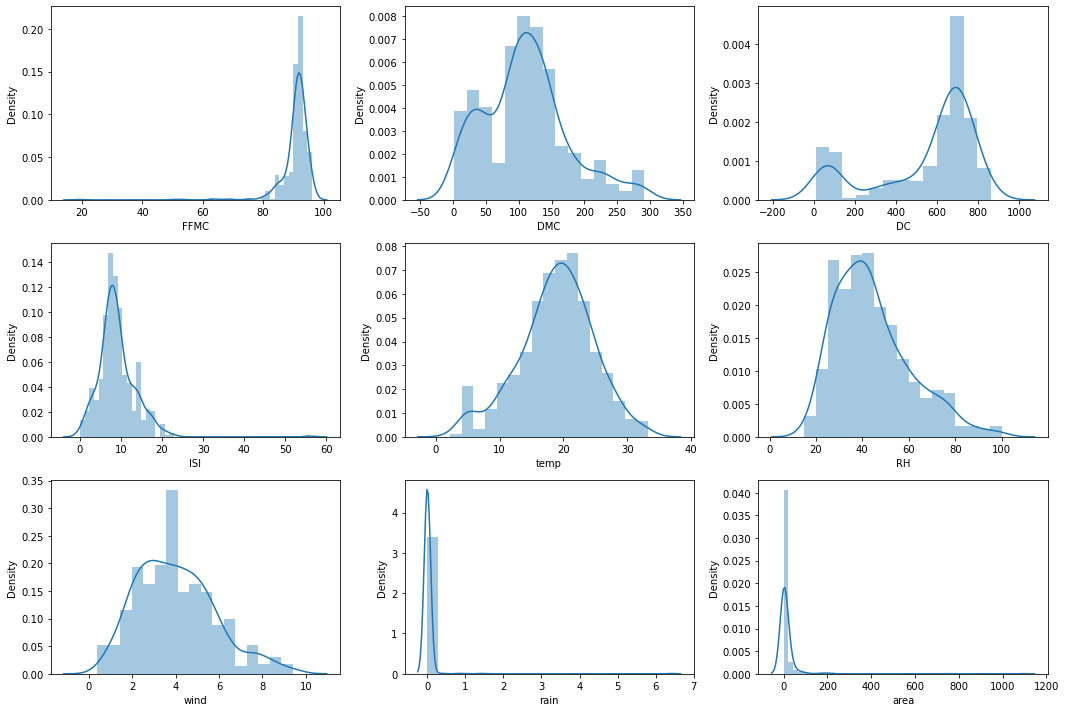

In [16]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))

sns.distplot(df.FFMC, ax=ax[0,0])
sns.distplot(df.DMC, ax=ax[0,1])
sns.distplot(df.DC, ax=ax[0,2])
sns.distplot(df.ISI, ax=ax[1,0])
sns.distplot(df.temp, ax=ax[1,1])
sns.distplot(df.RH, ax=ax[1,2])
sns.distplot(df.wind, ax=ax[2,0])
sns.distplot(df.rain, ax=ax[2,1])
sns.distplot(df.area, ax=ax[2,2])

plt.tight_layout()
plt.show()

##### Correlation

In [17]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

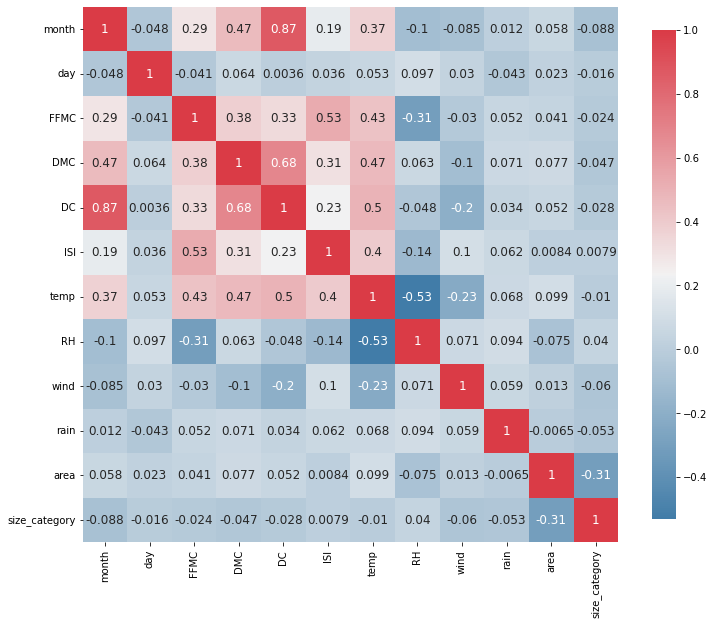

In [18]:
plot_correlation_map(df)

##### Considering dependent and independent variables

In [19]:
x = df.iloc[:,0:11].values
y = df.iloc[:,-1].values

In [20]:
x

array([[ 3.  ,  5.  , 86.2 , ...,  6.7 ,  0.  ,  0.  ],
       [10.  ,  2.  , 90.6 , ...,  0.9 ,  0.  ,  0.  ],
       [10.  ,  6.  , 90.6 , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 8.  ,  7.  , 81.6 , ...,  6.7 ,  0.  , 11.16],
       [ 8.  ,  6.  , 94.4 , ...,  4.  ,  0.  ,  0.  ],
       [11.  ,  2.  , 79.5 , ...,  4.5 ,  0.  ,  0.  ]])

In [21]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

##### Test | Train Split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((356, 11), (153, 11), (356,), (153,))

##### GridSearchCV

##### Constructing a SVM model with Kernel 'linear'  and running it on the grid search to identify the best values

In [24]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.9803921568627451


##### Constructing a SVM model with Kernel 'poly' and running it on the grid search to identify the best values with different gamma and C values

In [25]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.8366013071895425


##### Constructing a SVM model with Kernel 'rbf' and running it on the grid search to identify the best values with different gamma and C values

In [26]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.7973856209150327


##### Constructing a SVM model with Kernel 'sigmoid' and running it on the grid search to identify the best values with different gamma and C values

In [27]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.7516339869281046


##### Conclusion:

- Its is evident that the SVM with linear Kernel, gives better result when compared to others.
- So, we can use a linear kerenel in SVM, to classify the area of forest fire with a higher accuracy.